<a href="https://colab.research.google.com/github/RatanakamonS/DADS5001-PART1/blob/main/Week5_Smartphone_Using_Analysis_with_Logistic_Regression_DADS6003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Library

### - Importing a library that is not in Colaboratory

In [ ]:
!pip install shap
import shap

### - Importing a library in Colaboratory

In [82]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier



# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# #from sklearn.preprocessing import OrdinalEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import seaborn as sns


- จัดการ Front ภาษาไทย

In [84]:
# ดาวน์โหลดไฟล์ฟอนต์ "TH Sarabun New" จาก GitHub
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# เพิ่มฟอนต์ที่ดาวน์โหลดมาเข้าไปใน Font Manager ของ Matplotlib
fm.fontManager.addfont('thsarabunnew-webfont.ttf')
# ตั้งค่าให้ฟอนต์ "TH Sarabun New" เป็นฟอนต์เริ่มต้นสำหรับ Matplotlib
mpl.rc('font', family='TH Sarabun New')

--2024-09-10 06:57:52--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-09-10 06:57:52--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.3’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.003s  

2024-09-10 06:57:52 (34.7 MB/s) - 

## 1. Get data and clean data

### 1.1 Get "the Smartphone Using dataset" from Github

In [69]:
url = 'https://raw.githubusercontent.com/RatanakamonS/DADS6003/main/DB-%E0%B8%AA%E0%B8%B3%E0%B8%A3%E0%B8%A7%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89%20Smartphone%20(Responses)-Week5%20-%20Form%20Responses.csv'
df = pd.read_csv(url)
df.head()

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด
0,1/13/2024 14:30:33,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS และ Andriod,น้อยที่สุด,ปานกลาง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,apple ecosystem ทั้งบ้านแล้ว
1,1/13/2024 14:41:25,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์
2,1/13/2024 15:01:08,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร
3,1/13/2024 15:01:44,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม
4,1/13/2024 15:01:48,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน


### 1.2 Clean data

- เปลี่ยนชื่อ Features (คอลัมน์)

In [70]:
df.columns = ['time', 'gender', 'age', 'job', 'salary' ,'os', 'game', 'social_media', 'movies_song', 'photo_video', 'new_brand', 'by_reason']

- ลบ Features (คอลัมน์) ที่ไม่ใช้และ Row ที่มีค่าว่าง

In [71]:
df = df.drop(columns=['time', 'by_reason'])
df = df.dropna()
df = df[(df['gender'] != '-') & (df['job'] != '.') & ((df['os'] != 'IOS และ Andriod'))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 1 to 74
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gender        69 non-null     object
 1   age           69 non-null     object
 2   job           69 non-null     object
 3   salary        69 non-null     object
 4   os            69 non-null     object
 5   game          69 non-null     object
 6   social_media  69 non-null     object
 7   movies_song   69 non-null     object
 8   photo_video   69 non-null     object
 9   new_brand     69 non-null     object
dtypes: object(10)
memory usage: 5.9+ KB


### 1.3 Define target feature and transform datatype

-  กำหนดให้ คอลัมน์ target ชื่อ 'os' (ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด) และแปลง datatype เป็น numeric

In [72]:
# เลือก target variable
target = 'os'

# แปลง categorical variables เป็น numeric
df_encoded = pd.get_dummies(df.drop(columns=[target]), drop_first=True)

# แปลง target variable เป็น numeric ด้วย LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df[target])

# เลือก features
X = df_encoded

## 2. Train and Test (70%: 30%)

In [77]:
# แบ่งข้อมูลเป็น train และ test sets, เลข random_state = 42 ดีที่สุด
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Train Model

In [74]:
# ปรับ scale ของข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# สร้างและ train โมเดล Multinomial Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

     Android       0.00      0.00      0.00         0
         IOS       1.00      0.79      0.88        14

    accuracy                           0.79        14
   macro avg       0.50      0.39      0.44        14
weighted avg       1.00      0.79      0.88        14


Confusion Matrix:
[[ 0  0]
 [ 3 11]]

Top 10 Most Important Features:
                      feature  importance
34          new_brand_Samsung    0.707500
13  salary_มากกว่า 60,000 บาท    0.655781
30           new_brand_Iphone    0.597563
17               game_ปานกลาง    0.510388
27      photo_video_บ่อยครั้ง    0.368060
16            game_บ่อยที่สุด    0.360686
14            game_น้อยที่สุด    0.352526
31            new_brand_Nokia    0.326349
15             game_บ่อยครั้ง    0.304891
10   salary_40,001-50,000 บาท    0.293841


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


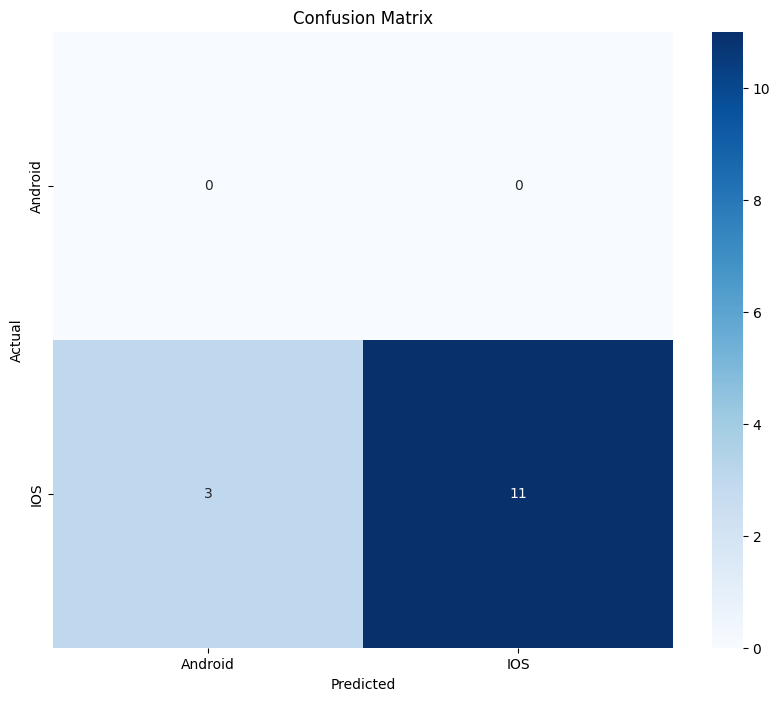

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

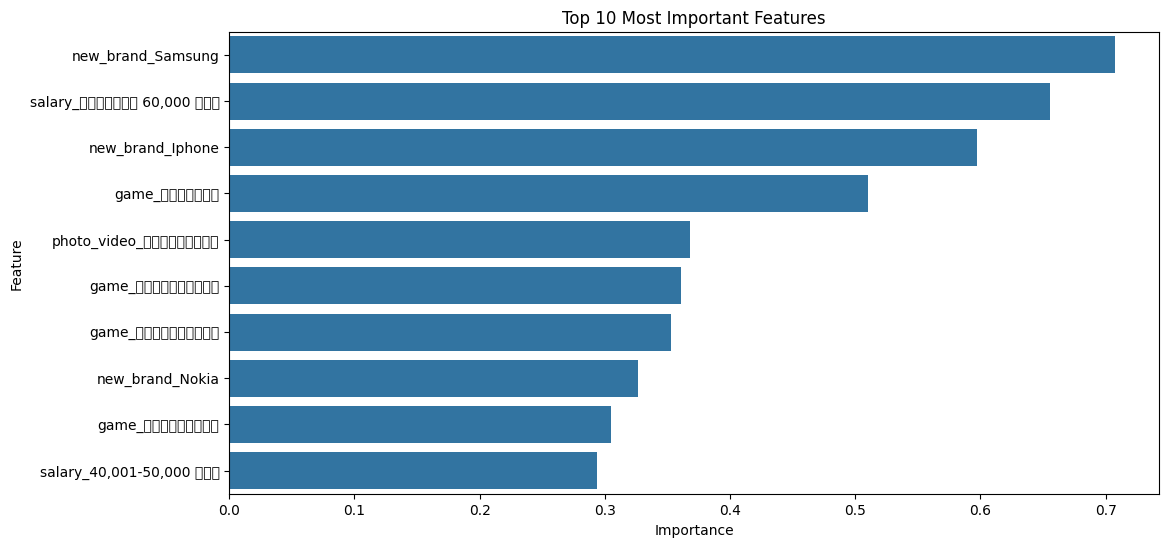


Prediction for new data:
Predicted OS: IOS
Probabilities:
Android: 0.1715
IOS: 0.8285


In [75]:
# ทำนายผลลัพธ์
y_pred = model.predict(X_test_scaled)

# ประเมินประสิทธิภาพของโมเดล
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# วิเคราะห์ความสำคัญของ features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.mean(np.abs(model.coef_), axis=0)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# สร้าง confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# สร้างกราฟแสดงความสำคัญของ features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# ทดสอบการทำนายด้วยข้อมูลใหม่
new_data = X_test.iloc[0:1]  # ใช้ข้อมูลแถวแรกของ test set เป็นตัวอย่าง
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
prediction_proba = model.predict_proba(new_data_scaled)

print("\nPrediction for new data:")
print("Predicted OS:", le.inverse_transform(prediction)[0])
print("Probabilities:")
for os, prob in zip(le.classes_, prediction_proba[0]):
    print(f"{os}: {prob:.4f}")

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3597 (\N{THAI CHARACTER YO YING}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from current font.
  pl.tigh

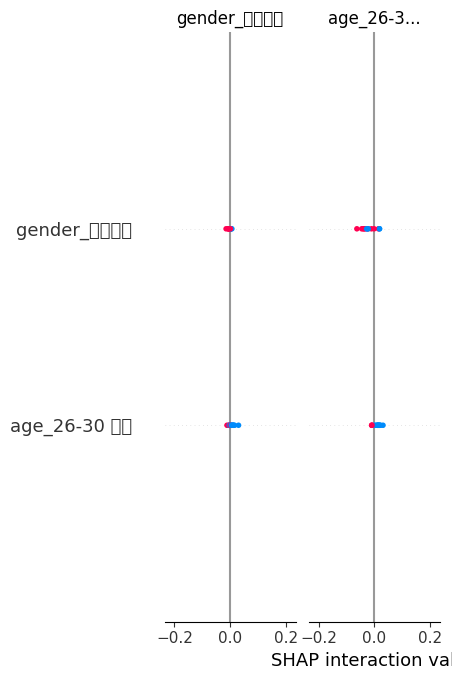

DimensionError: Length of features is not equal to the length of shap_values!

In [76]:
#Importing a library that is not in Colaboratory
!pip install shap

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import shap

# 1. Get data and clean data
# 1.1 Get "the Smartphone Using dataset" from Github
url = 'https://raw.githubusercontent.com/RatanakamonS/DADS6003/main/DB-%E0%B8%AA%E0%B8%B3%E0%B8%A3%E0%B8%A7%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89%20Smartphone%20(Responses)-Week5%20-%20Form%20Responses.csv'
df = pd.read_csv(url)

# 1.2 Clean data
# เปลี่ยนชื่อคอลัมน์
df.columns = ['time', 'gender', 'age', 'job', 'salary' ,'os', 'game', 'social_media', 'movies_song', 'photo_video', 'new_brand', 'by_reason']

# ลบคอลัมน์ที่ไม่ใช้ศึกษาและแถวที่มีค่าว่าง
df = df.drop(columns=['time', 'by_reason'])
df = df.dropna()
df = df[(df['gender'] != '-') & (df['job'] != '.') & ((df['os'] != 'IOS และ Andriod'))]

# 1.3 Define target feature and transform datatype
# กำหนดให้ คอลัมน์ target ชื่อ 'os' และแปลง datatype เป็น numeric
target = 'os'
df_encoded = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
le = LabelEncoder()
y = le.fit_transform(df[target])
X = df_encoded

# 2. Train and Test (80%: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. SHAP Explain
# 4.1 Build on X Train
explainer = shap.TreeExplainer(model)

# 4.2 Explained X Test
shap_values = explainer.shap_values(X_test)

# 5. Results
# 5.1 Rank Feature Importance by using beeswarm
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 5.2 Analyze one sample (Randomly) from test set
sample_index = np.random.randint(0, X_test.shape[0])
shap.force_plot(explainer.expected_value[0], shap_values[0][sample_index,:], X_test.iloc[sample_index,:])

print("Model Accuracy:", model.score(X_test, y_test))
print("\nFeature Importances:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")

print("\nSample Prediction:")
print("Actual:", le.inverse_transform([y_test[sample_index]])[0])
print("Predicted:", le.inverse_transform([model.predict(X_test.iloc[sample_index].to_frame().T)[0]])[0])